In [183]:
# Term Project: IPL 2022 EDA Analysis


In [184]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/usamara/DSC530/blob/main/Book_ipl22_ver_33.csv")

In [185]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
import thinkplot
import thinkstats2
import warnings
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

import os

In [186]:
#ipl_data = pd.read_csv("/kaggle/input/ipl-2022dataset/Book_ipl22_ver_33.csv")
ipl_data = pd.read_csv("/Users/rajibsamanta/Documents/Rajib/College/Sem4_2023/Project/Book_ipl22_ver_33.csv",encoding ='unicode_escape')
# to avoid encoding error use unicode_escape parameter
ipl_data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [187]:
# Important variables
## The dataset contains all the information needed to summarize the story of IPL 2022 so far.
## Here are key variables
## Venue --> Matched played on Stadium
## team1 --> First Team ,team2--> opponent team 
## first_ings_score --> fisrt batting team score ,first_ings_wkts--> fisrt batting team loose wicket to score
## second_ings_score --> 2nd batting team score , second_ings_wkts--> 2nd batting team loose wicket to score
## match_winner --> Team win the match
## player_of_the_match --> Best player of the match

In [188]:
# Data Cleaning
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [189]:
# Check for null
ipl_data.isna().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [190]:
# There is no null value column , so no need to drop or transform any row
## All column holds some information , no unrelated column , so no need to drop any column

<AxesSubplot:xlabel='count', ylabel='venue'>

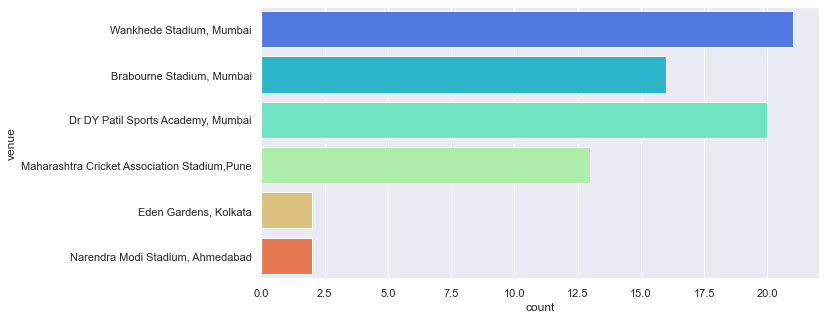

In [191]:
# Plot histogram for important variables
# variable =venue
sns.countplot(y='venue',data=ipl_data,palette='rainbow')
# The below hitrogram plot shows more matches were conducted on wankhede mumbai

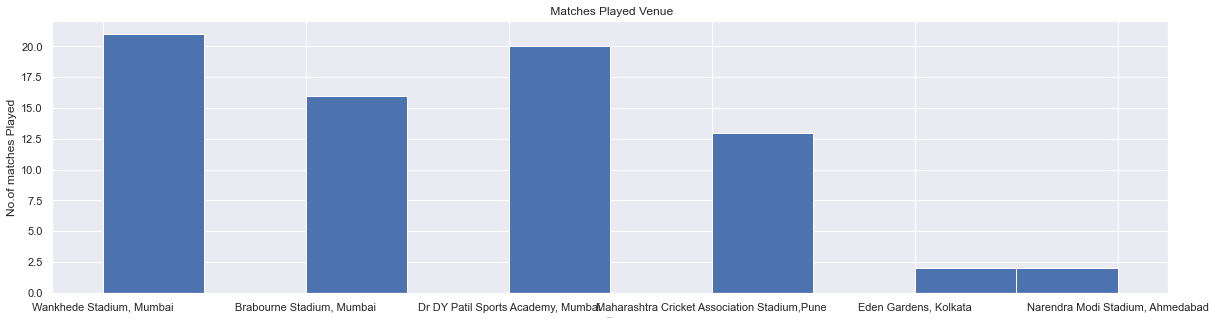

In [192]:
# histogram for venue using matplotlib
params = {'figure.figsize': (20, 5)}
plt.rcParams.update(params)
plt.hist(ipl_data['venue'])
plt.xlabel("Stadium/Venue",fontsize=1)
plt.ylabel("No.of matches Played")
plt.title(" Matches Played Venue")
plt.show()

<AxesSubplot:xlabel='count', ylabel='toss_winner'>

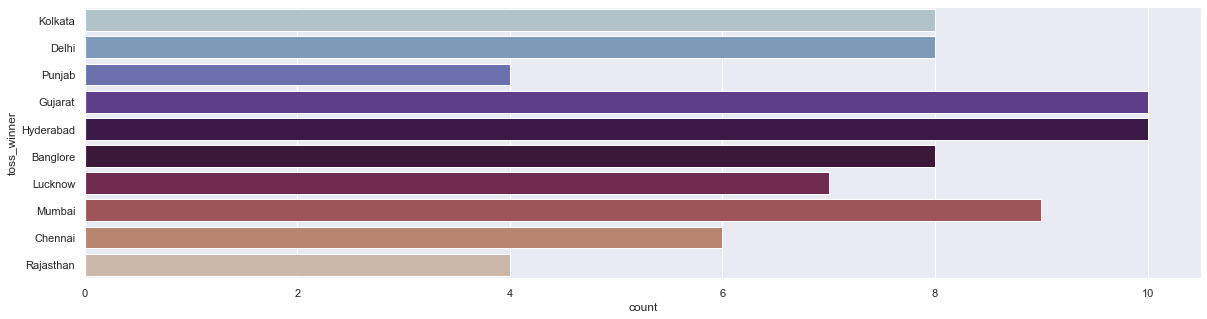

In [193]:
# Toss winner Histogram
sns.countplot(y='toss_winner',data=ipl_data,palette='twilight')
#The below plot shows that more tosses were won by Gujarat and Hyderabad

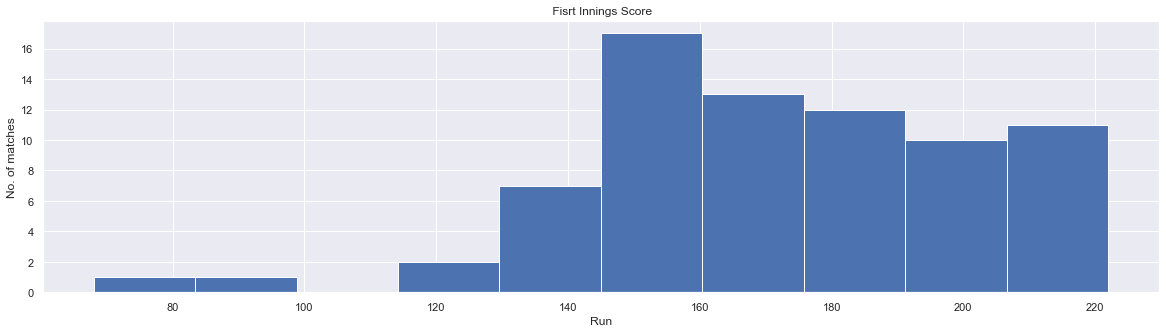

In [194]:
# histogram for first_ings_score using matplotlib
plt.hist(ipl_data['first_ings_score'])
plt.xlabel("Run")
plt.ylabel("No. of matches")
plt.title(" Fisrt Innings Score")
plt.show()

In [195]:
# Above histogram shows that first innings score mostly between 110 to 220 , below 100 we can consider as outlier

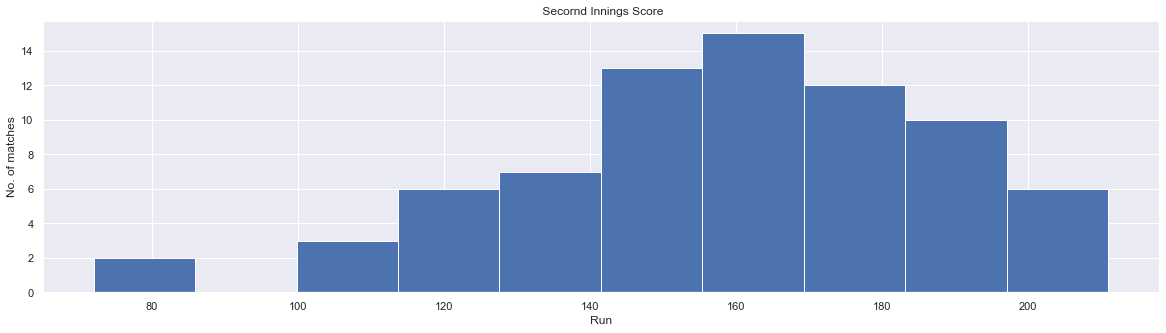

In [196]:
# histogram for second_ings_score using matplotlib
plt.hist(ipl_data['second_ings_score'])
plt.xlabel("Run")
plt.ylabel("No. of matches")
plt.title(" Secornd Innings Score")
plt.show()


In [197]:
# Above histogram shows that 2nd innings score mostly between 110 to 220 , below 100 we can consider as outlier

<AxesSubplot:xlabel='count', ylabel='match_winner'>

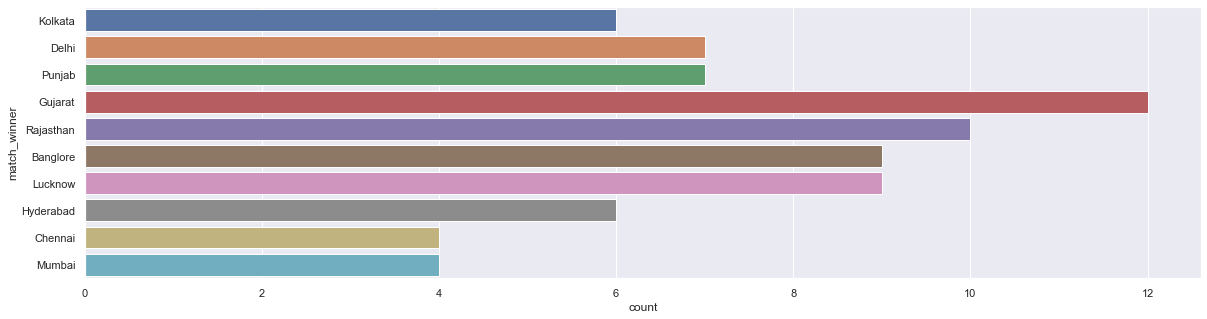

In [198]:
# Match winner histogram sns plot
sns.countplot(y='match_winner',data=ipl_data)
# As per below plot Gujarat has won the most matches

<AxesSubplot:ylabel='player_of_the_match'>

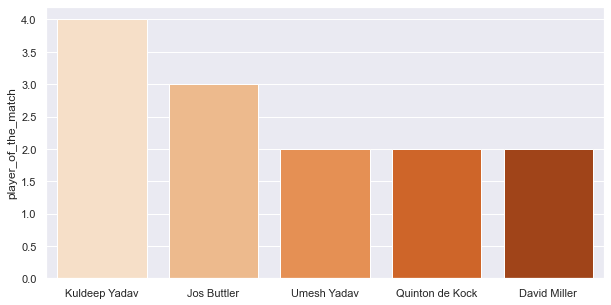

In [199]:
# top player barplot
# set chart size to display text properly
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y=TOP_5_players,x=TOP_5_players.index,palette='Oranges')

In [200]:
# The Above graph show that top player maximum player of the match winner , Kuldeep Yadav score higesht in this category

In [201]:
# Determine descriptive characteristics about the variables: Mean, Mode, Spread, and Tails .
ipl_data.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


In [202]:
ipl_data['first_ings_score'].mode()

0    169
1    177
2    189
3    210
Name: first_ings_score, dtype: int64

In [203]:
# The above varibles descriptive characteristics shows that 75% matches first innings score is around 192 where as 2nd innings score is 176.Highest score for individual player around 87 run.

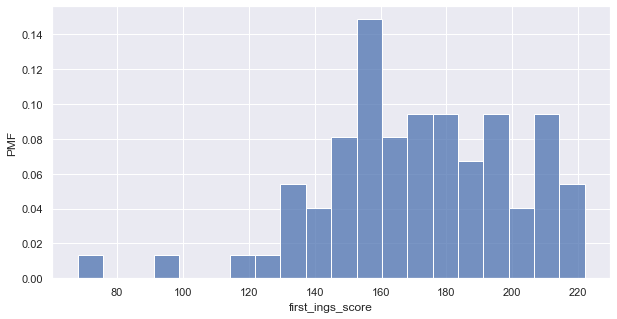

In [204]:
# Determine PMF( Probability Mass function) for first_ings_score
plt.ylabel('PMF')
sns.histplot(ipl_data['first_ings_score'], stat='probability', bins=20);

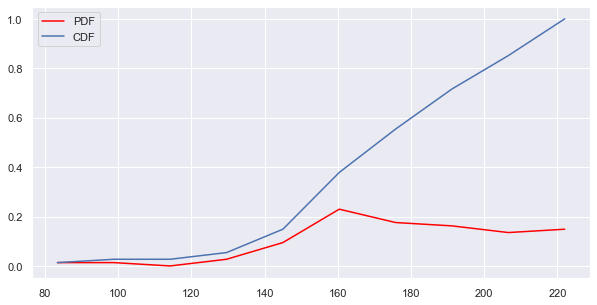

In [205]:
# Determine PDF(Probability Distribution Function) & CDF(cumulative distribution function) for first_ings_score
# initializing  values
data = ipl_data['first_ings_score'] 
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

<AxesSubplot:ylabel='toss_decision'>

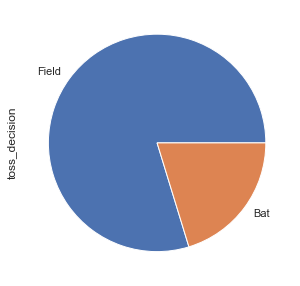

In [206]:
# analytical distribution 
ipl_data['toss_decision'].value_counts().plot.pie(figsize=(5,5))
# As per below plot Fielding was chosen the most by toss-winners

In [207]:
# The number of matches won by each team in IPL 2022
figure = px.bar(ipl_data, x=ipl_data["match_winner"],
            title="Number of Matches Won in IPL 2022")
figure.show()

In [208]:
# So, currently, Gujrat is leading the tournament by winning eight matches. It is an achievement as a new team for Gujrat in IPL

In [209]:
#  Here we will analyze whether most of the teams win by defending (batting first) or chasing (batting second)
ipl_data["won_by"] = ipl_data["won_by"].map({"Wickets": "Chasing","Runs": "Defending"})
won_by = ipl_data["won_by"].value_counts()
# won_by
label = won_by.index
counts = won_by.values
colors = ['blue','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=20,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()
# Winning chance batting first or 2nd is same (50%)

In [210]:
# look at whether most of the wickets fall while setting the target or while chasing the target:
figure = go.Figure()
figure.add_trace(go.Bar(
    x=ipl_data["venue"],
    y=ipl_data["first_ings_wkts"],
    name='First Innings Wickets',
    marker_color='gold'
))
figure.add_trace(go.Bar(
    x=ipl_data["venue"],
    y=ipl_data["second_ings_wkts"],
    name='Second Innings Wickets',
    marker_color='lightgreen'
))
figure.update_layout(barmode='group', xaxis_tickangle=-45)
figure.show()

In [211]:
# So in the Wankhede Stadium in Mumbai and MCA Stadium in Pune, most wickets fall while chasing the target. And in the other two stadiums, most wickets fall while setting the target.

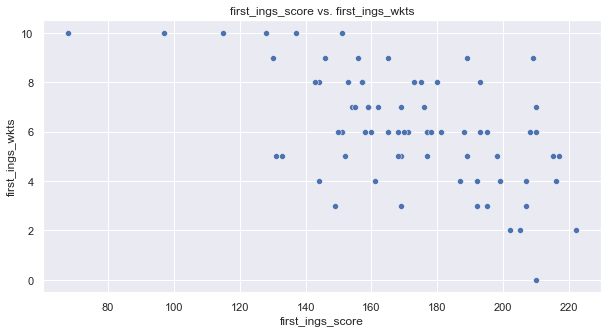

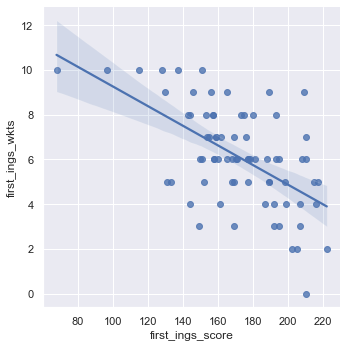

In [212]:
## Correlation with Scatter plot for first innigs_score vrs first innigs_wickets means while setting 
## the target with  best-fit line 
ax = sns.scatterplot(x="first_ings_score", y="first_ings_wkts", data=ipl_data)
ax.set_title("first_ings_score vs. first_ings_wkts")
ax.set_xlabel("first_ings_score");
sns.lmplot(x="first_ings_score", y="first_ings_wkts", data=ipl_data);

In [213]:
# Coefficient of correlation
stats.pearsonr(ipl_data['first_ings_score'], ipl_data['first_ings_wkts'])

(-0.5750145215715519, 8.406575080712691e-08)

In [214]:
# We conclude based on this that there is medium ngetive linear relationship between first_ings_score and 
# first_ings_wkts.In other words, it seems that first_ings_wkts does have some influence on first_ings_score 

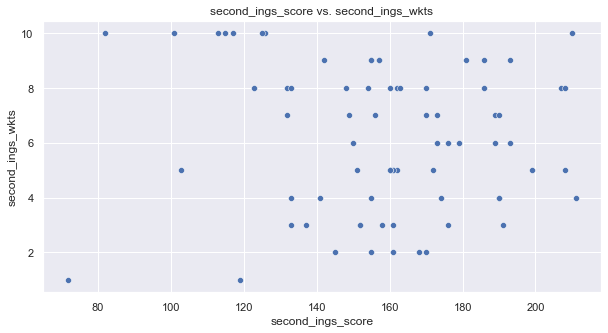

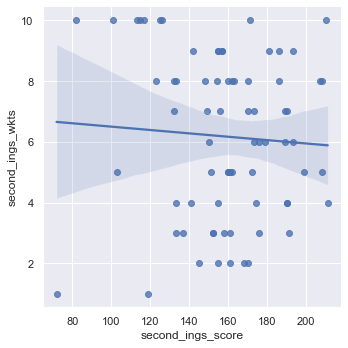

In [215]:
## Correlation with Scatter plot for 2nd innigs_score vrs 2nd innigs_wickets means while chasing with  best-fit line 
ax = sns.scatterplot(x="second_ings_score", y="second_ings_wkts", data=ipl_data)
ax.set_title("second_ings_score vs. second_ings_wkts")
ax.set_xlabel("second_ings_score");
sns.lmplot(x="second_ings_score", y="second_ings_wkts", data=ipl_data);

In [216]:
# Pearson Coefficient of correlation
stats.pearsonr(ipl_data['second_ings_score'], ipl_data['second_ings_wkts'])

(-0.06163932616910728, 0.6018716734072516)

In [217]:
# We conclude based on this that there is weak ngetive linear relationship between second_ings_score and second_ings_wkts but not so weak that we should conclude the variables are uncorrelated. In other words, it seems that fly ash does have some influence on concrete strength.

In [218]:
cormat = ipl_data.corr()
round(cormat,2)

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
match_id,1.00,-0.05,0.01,-0.14,-0.04,0.12,0.06
first_ings_score,-0.05,1.00,-0.58,0.70,0.49,0.28,0.57
first_ings_wkts,0.01,-0.58,1.00,-0.51,-0.23,-0.02,-0.56
second_ings_score,-0.14,0.70,-0.51,1.00,-0.06,-0.47,0.56
second_ings_wkts,-0.04,0.49,-0.23,-0.06,1.00,0.60,0.15
margin,0.12,0.28,-0.02,-0.47,0.60,1.00,-0.05
highscore,0.06,0.57,-0.56,0.56,0.15,-0.05,1.00


In [219]:
#hypothesis Testing
# perform one sample t-test
# One sample t-test: The One Sample t-test ascertains if the sample average differs statistically from an actual or apposed population mean.
# A parametric testing technique is the One Sample t-test.
# Let determine the average first innings score is 160 ?
first_ings_score_mean= ipl_data['first_ings_score'].mean()
stats.ttest_1samp(ipl_data['first_ings_score'], 160)

Ttest_1sampResult(statistic=3.293536138648463, pvalue=0.0015275358256629731)

In [220]:
## Since the p-value of the test (0.001527535820) is less than .05, we reject the null hypothesis.

In [221]:
# regression analysis

# Initialise and fit linear regression model using statsmodels
model = smf.ols('first_ings_wkts ~ first_ings_score', data=ipl_data)
model = model.fit()

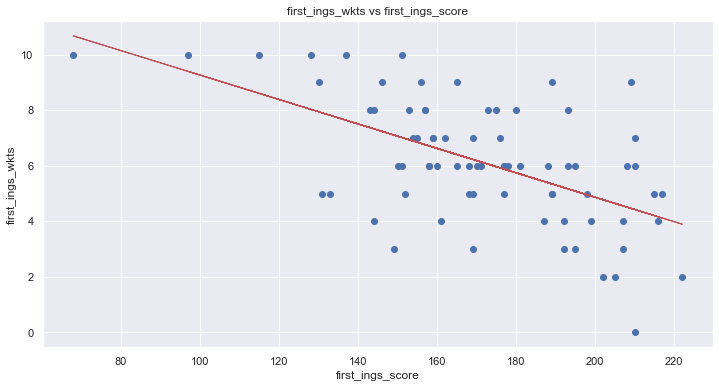

In [222]:
# Predict values
first_ings_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(ipl_data['first_ings_score'], ipl_data['first_ings_wkts'], 'o')           # scatter plot showing actual data
plt.plot(ipl_data['first_ings_score'], first_ings_pred, 'r', linewidth=1)   # regression line
plt.xlabel('first_ings_score')
plt.ylabel('first_ings_wkts')
plt.title('first_ings_wkts vs first_ings_score')

plt.show()

In [223]:
# We can see that there is a negetive linear relationship between first_ings_score and first_ings_wkts — in other words, 
# loosing less wickets predicts a higher score!

In [224]:
# Venue list
ipl_data['venue'].unique()

array(['Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium,Pune',
       'Eden Gardens, Kolkata', 'Narendra Modi Stadium, Ahmedabad'],
      dtype=object)

In [225]:
# Top scorer
top_scorer=ipl_data.groupby('highscore')['top_scorer'].max()
#top_scorer

<AxesSubplot:>

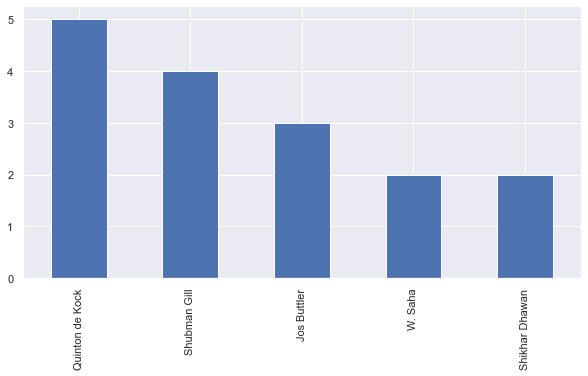

In [226]:
#high score with top performance
top_scorer.value_counts().nlargest(5).plot(kind='bar')
# As per below plot Quinton de Kock has the high score with top performance

In [227]:
top5_bowlers=ipl_data['best_bowling'].value_counts().nlargest(5)
top5_bowlers

Yuzvendra Chahal    5
Rashid Khan         4
T Natarajan         3
Kagiso Rabada       3
Jasprit Bumrah      3
Name: best_bowling, dtype: int64

<AxesSubplot:xlabel='best_bowling'>

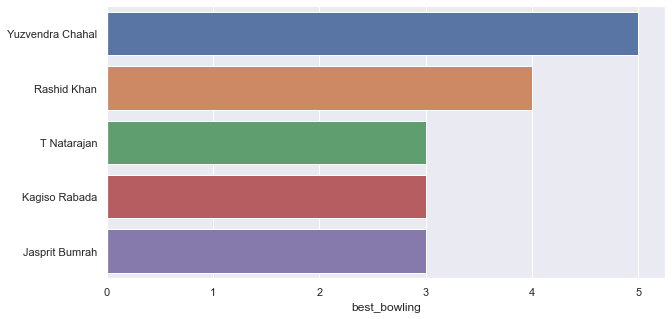

In [228]:
sns.barplot(x=top5_bowlers,y=top5_bowlers.index)
# As per below Yuzevendra chahal was the best bowler

In [229]:
Top5_bowling_figure=ipl_data['best_bowling_figure'].value_counts().nlargest(5)
Top5_bowling_figure


3--22    5
3--20    3
2--23    3
3--25    3
2--24    3
Name: best_bowling_figure, dtype: int64

<AxesSubplot:xlabel='best_bowling_figure'>

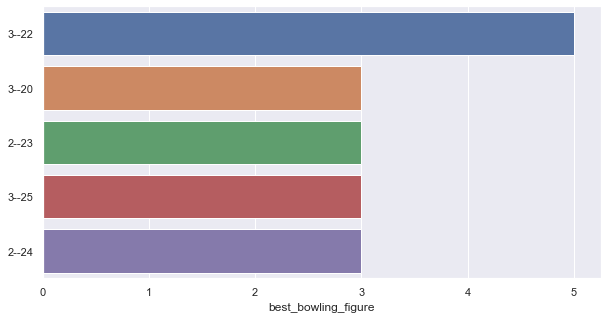

In [230]:
sns.barplot(x=Top5_bowling_figure,y=Top5_bowling_figure.index)
# As per the below plot 3-22 is the most bowling figure